<a href="https://colab.research.google.com/github/AmeyChavan-Org/Data_Mining/blob/main/Ass9(D_T).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

Importing the data set

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car.csv.data',delimiter='\t')
df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,2,med,med,good
1724,low,low,5more,4,med,high,vgood
1725,low,low,5more,4,big,low,unacc
1726,low,low,5more,4,big,med,good


Lisiting out all the columns

In [ ]:
print(df.columns)

Index(['buying price', ' maintenance cost', ' number of doors',
       ' number of persons', ' lug_boot', ' safety', ' decision'],
      dtype='object')


Now normalizing all the values of columns and finding there co-relation

In [ ]:
df = df.replace('vhigh',3)
df = df.replace('high',2)
df = df.replace('low',0)
df = df.replace('med',1)
df = df.replace('small',0)
df = df.replace('big',2)

df = df.replace('5more',5)
df = df.replace('good',2)
df = df.replace('vgood',0)


df = df.replace('unacc',0)
df = df.replace('acc',1)

df



,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,2,1,1,2
1724,0,0,5,4,1,2,0
1725,0,0,5,4,2,0,0
1726,0,0,5,4,2,1,2


In [ ]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,buying price,maintenance cost,number of persons,lug_boot,safety,decision
buying price,1.000000e+00,-1.356939e-15,0.000518,-1.045866e-16,-4.082114e-16,-0.182406
maintenance cost,-1.356939e-15,1.000000e+00,-0.004659,8.544286e-17,-7.826398e-17,-0.188166
number of persons,5.176669e-04,-4.659002e-03,1.000000,2.636902e-01,8.506136e-02,0.351942
lug_boot,-1.045866e-16,8.544286e-17,0.263690,1.000000e+00,1.927471e-18,0.059156
safety,-4.082114e-16,-7.826398e-17,0.085061,1.927471e-18,1.000000e+00,0.347049
decision,-1.824063e-01,-1.881665e-01,0.351942,5.915607e-02,3.470489e-01,1.000000


#creating X and Y

In [ ]:
x = df.iloc[:, [0,1,3,4,5]].values
y = df.iloc[:, 6].values 
y

array([0, 0, 0, ..., 0, 2, 0])

#Spliting the data set into traning and testing set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(1296, 5)
(432, 5)


Feature Scaling. Only scale the X_train and X_test. It does not need Feature Scaling because it is a preprocessing step when the algorithm is based on the Euclidean distance.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train)
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)

[[2 3 2 2 1]
 [2 2 2 0 0]
 [1 2 2 0 0]
 ...
 [0 0 2 2 0]
 [2 2 2 0 1]
 [2 1 4 0 0]]
[[ 0.437572    1.37519152 -0.98468516  1.23282188  0.01312549]
 [ 0.437572    0.4786884  -0.98468516 -1.22523528 -1.20192031]
 [-0.45689694  0.4786884  -0.98468516 -1.22523528 -1.20192031]
 ...
 [-1.35136589 -1.31431785 -0.98468516  1.23282188 -1.20192031]
 [ 0.437572    0.4786884  -0.98468516 -1.22523528  0.01312549]
 [ 0.437572   -0.41781473  1.01555303 -1.22523528 -1.20192031]]


**We know that,Impurity will increase while the entropy and gini index value decrease**

In [ ]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0) 
classifier =classifier.fit(x_train,y_train)
classifier


DecisionTreeClassifier(criterion='entropy', random_state=0)

#Predicting the Test set results And Checking the Accuracy

In [ ]:
y_pred = classifier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9050925925925926


#Checking the results through Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[306   6   0]
 [ 25  71   3]
 [  6   1  14]]


#Creating the decision tree 

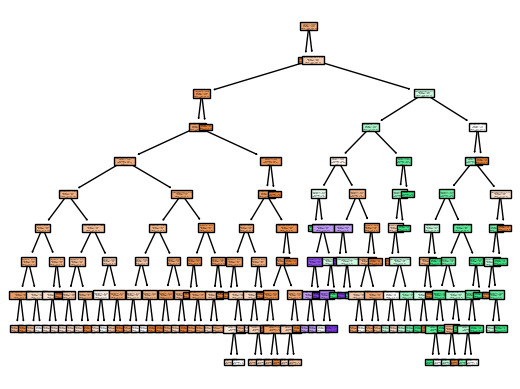

In [ ]:
from sklearn import tree
tree.plot_tree(classifier, feature_names = ['buying price',' maintenance cost',' number of persons', ' lug_boot', ' safety'],
               class_names=['0','1','2','3','4'],
               filled = True);

we have used entropy to decide the spliting attribute and the accuracy was more than 60%, Now let us find out gini index

In [ ]:
classifier = DecisionTreeClassifier(criterion= 'gini' ,random_state=0) 
classifier =classifier.fit(x_train,y_train)
classifier

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9050925925925926


the accuracy changes slightly

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[306   6   0]
 [ 25  71   3]
 [  6   1  14]]
